# **Object Tracking**

In [12]:
# Import modules
# Import urllib

import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import display,HTML
from base64 import b64encode

%matplotlib inline

# **Download Assets**

In [13]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [14]:
URL = r"https://www.dropbox.com/s/ld535c8e0vueq6x/opencv_bootcamp_assets_NB11.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB11.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

# **Tracker Class in OpenCV**

1. BOOSTING
2. MIL
3. KCF
4. CRST
5. TLD
 > Tends to recover from occulusions
6. MEDIANFLOW
 >Good for predictable slow motion
7. GOTURN
 >Deep Learning based
 >Most Accurate
8. MOSSE
 >Fastest


In [15]:
video_input_filename="race_car.mp4"

def drawrect(frame,bbox):
    p1=(int(bbox[0]),int(bbox[1]))
    p2=(int(bbox[0]+bbox[2]),int(bbox[1]+bbox[3]))
    cv2.rectangle(frame,p1,p2,(255,0,0),2,1)

def displayrect(frame,bbox):
    plt.figure(figsize=(20,10))
    frameCopy=frame.copy()
    drawrect(frameCopy,bbox)
    frameCopy=cv2.cvtColor(frameCopy,cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)
    plt.axis("off")

def drawtext(frame,txt,location,color=(50,170,50)):
    cv2.putText(frame,txt,location,cv2.FONT_HERSHEY_SIMPLEX,1,color,3)

# **GOTURN Tracker**

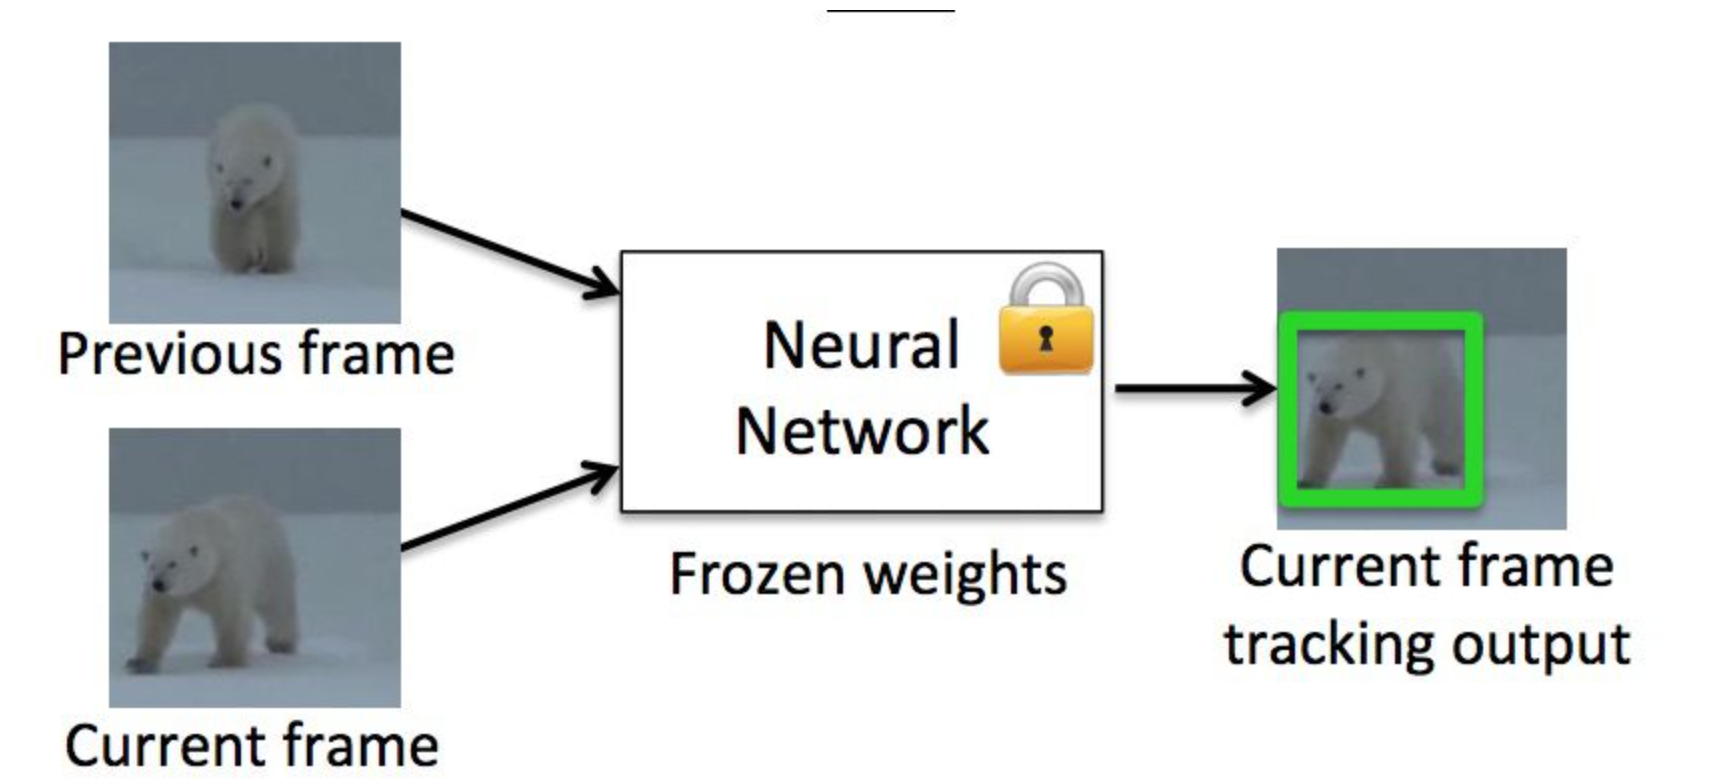



# **Create the Tracker instance**

In [16]:
# Set up tracker
tracker_types=[
    "BOOSTING",
    "MIL",
    "KCF",
    "CSRT",
    "TLD",
    "MEDIANFLOW",
    "GOTURN",
    "MOSSE"
]

# Change the index to change the tracker type
tracker_type=tracker_types[6]

if tracker_type == "BOOSTING":
    tracker = cv2.legacy.TrackerBoosting.create()
elif tracker_type == "MIL":
    tracker = cv2.legacy.TrackerMIL.create()
elif tracker_type == "KCF":
    tracker = cv2.TrackerKCF.create()
elif tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT.create()
elif tracker_type == "TLD":
    tracker = cv2.legacy.TrackerTLD.create()
elif tracker_type == "MEDIANFLOW":
    tracker = cv2.legacy.TrackerMedianFlow.create()
elif tracker_type == "GOTURN":
    tracker = cv2.TrackerGOTURN.create()
else:
    tracker = cv2.legacy.TrackerMOSSE.create()

| Tracker        | Meaning (Very Short) | Use When               | Speed         | Accuracy |
| -------------- | -------------------- | ---------------------- | ------------- | -------- |
| **BOOSTING**   | Old ML tracker       | Learning / demo only   | Slow          | Low      |
| **MIL**        | Improved boosting    | Object partially hides | Medium        | Medium   |
| **KCF**        | Correlation filter   | **Real-time tracking** | **Fast**      | Medium   |
| **CSRT**       | Accurate correlation | **Need accuracy**      | Slow          | **High** |
| **TLD**        | Track + re-detect    | Object may disappear   | Very slow     | Medium   |
| **MEDIANFLOW** | Forward–backward     | Smooth motion only     | Fast          | Medium   |
| **GOTURN**     | Deep learning        | GPU + model available  | Fast          | High     |
| **MOSSE**      | Lightweight filter   | Low-power systems      | **Very fast** | Low      |


# **Read input video & Setup output Video**

In [17]:
# Read video
video=cv2.VideoCapture(video_input_filename)
ok,frame=video.read()

# Exit if video not opend
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    width=int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height=int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

video_output_filename="race_car-"+tracker_type+".mp4"
video_out=cv2.VideoWriter(video_output_filename,cv2.VideoWriter_fourcc(*"XVID"),10,(width,height))

video_output_filename

'race_car-GOTURN.mp4'

# **Define Bounding Box**

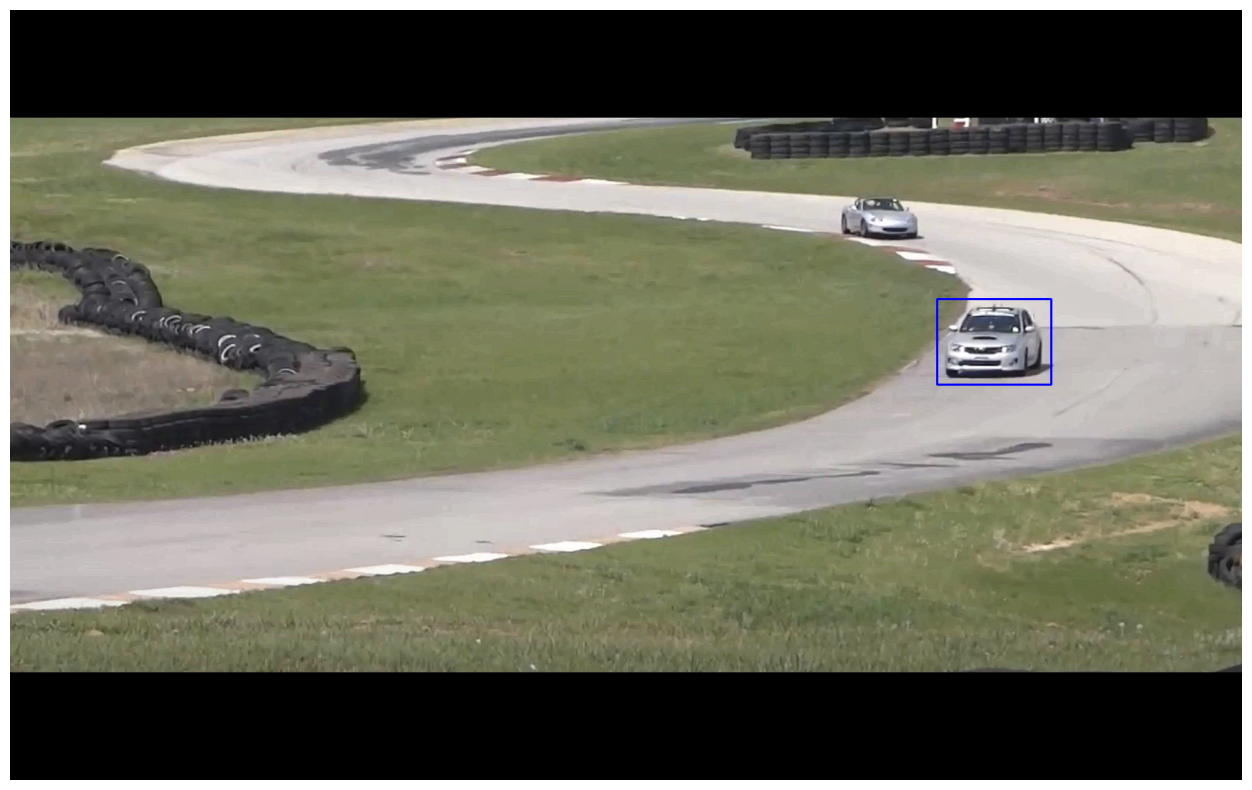

In [18]:
# Define a bounding box
bbox=(1300,405,160,120)
#bbox=cv2.selectROI(frame,False)
#print(box)
displayrect(frame,bbox)

# **Intilialize Tracker**

In [19]:
# Initialize tracker with first frame and bounding box

ok=tracker.init(frame,bbox)

# **Read frame and Track Object**

In [20]:
while True:
    ok, frame = video.read()

    if not ok:
        break

    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    # Draw bounding box
    if ok:
        drawrect(frame, bbox)
    else:
        drawtext(frame, "Tracking failure detected", (80, 140), (0, 0, 255))

    # Display Info
    drawtext(frame, tracker_type + " Tracker", (80, 60))
    drawtext(frame, "FPS : " + str(int(fps)), (80, 100))

    # Write frame to video
    video_out.write(frame)

video.release()
video_out.release()

In [21]:
# Change video encoding of mp4 file from XVID to h264 
!ffmpeg -y -i {video_output_filename} -c:v libx264 $"race_car_track_x264.mp4"  -hide_banner -loglevel error


In [22]:
mp4 = open("C:/Users/aumpa/OneDrive/Desktop/OpenCV/$race_car_track_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")
